<a href="https://colab.research.google.com/github/RakeshReddyKondeti/Robotics_UniversityofLuebeck/blob/master/ComputerVision_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision SS 2021
## Exercise Sheet 2: Image Aquisition, Optics
### Erhardt Barth / Philipp Gruening / Christoph Linse / Manuel Laufer
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{barth, gruening, linse, laufer} @inb.uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. Rakesh Reddy Kondeti
2. Christopher Schmale
3. Tim-Henrik Traving
4. 
5. 


## Exercise 2.1 
### Thin Lenses
Consider a thin lens with a fixed focal length $f$. The light rays coming from an object are focussed by the lens so that the depicted object is in focus at a distance $f_c$ behind the lens. This setting is visualized in the following figure:
<img src="https://github.com/inb-luebeck/cs4250/blob/master/thin_lens.jpg?raw=1" alt="drawing" width="400"/>

Draw a sketch of how $f_c$ would change for an object, which is placed closer to the lens and one placed further away.

If the object is placed further away from the lens, $f_c$ will become smaller and if the object is placed closer to the lense, $f_c$ will become bigger. See sketch on pdf file.

## Exercise 2.2
### The influence of the focal length
For a given object we place the image plane at the distance $f_c$ behind the lens, so that the object representation is in focus. How would the image change if the focal length of the lens would increase or decrease?

If the focal length increases, $f_c$ will increase as well. And if the focal length decreases, $f_c$ will decrease as well. See sketch on pdf file.

## Exercise 2.3
### The influence of the aperture
We now add an aperture to the previous model. For simplicity it is placed exactly at the position of the lens. This means that the aperture can be used to decrease the effective diameter of the lens without an influence on the focal length.
In the previous exercise the image plane was placed at the distance $f_c$ corresponding to a focal length $f$ of the lens. Then, the focal length is slightly reduced.
What influence does the reduction of the aperture have on the image? **Draw a sketch!** Which effect can one observe when the diameter of the aperture is very small?

The image appears to be darker with a smaller aperture. However, you can change the focus with an aperature. So if the Object is further away of the lens you can change the size of the aperature and than you will get a sharp image on the sensor. With a nearly closed aperature you will get a hole camera. This camera creates a sharp image with low light level. To increase the light level you will have to increase the exposure time. For very small holes you will get a inteference pattern at the single slit. See sketch on pdf file

---



## Exercise 2.4
### Conversion between pixel and camera coordinates
Load data set `ueb24.npy` `(np.load)`.
The image $B(i,j)$ is not a conventional intensity image. Each pixel $p = (x,y,f)^T$ encodes the distance from the focal point of the camera $(0, 0, 0)^T$ to a point in the 3D scene $P = (X, Y, Z)$. $p$ is the projection of $P$ on the image plane. So, the location corresponding to the pixel $p$ from the image matrix $B(i,j)$ will hold the distance $r$ between the point $P$ and the focal point. The image plane containing the pixel $p$, is placed at the distance $f$ from the focal point, parallel to the $XY$ plane.

<img src="https://github.com/inb-luebeck/cs4250/blob/master/cam_model.jpg?raw=1" alt="drawing" width="400"/>


Write a Python routine that maps each pixel $p$ in $B(i,j)$ to the corresponding point $P = (X,Y,Z)$. Visualize the result in a 3D surface plot `(plt.plot_surface)`. Consider that you are using a camera with focal length $f = 0.008$ meters and a CCD-chip, in which the size of a pixel is $0.00004$ meters. The optical axis intersects the centre of the image matrix, which corresponds to the frame coordinates $(71.5, 87.5)$ on the CCD-chip.

Some helpful commands: `np.arange, np.ones, np.meshgrid`.

In [ ]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

Cloning into 'cs4250'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 62 (delta 17), reused 52 (delta 11), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
# load matrix
ueb24 = np.load("/content/cs4250/data/exercise_2/ueb24.npy")
#print(ueb24[0][0])

# define constants
focalLenght = 0.008
pixleSize = 0.00004
imageCenter = (71.5, 87.5)
xSize = len(ueb24)
ySize = len(ueb24[0])

# Create 3 2d-Matrices, each containing the x,y and z value of a vector respecitively. 
# Those vectors are supposed to "point at" the image pixels from the centre of focus.
x = np.zeros(ueb24.shape)
y = np.zeros(ueb24.shape)
z = np.zeros(ueb24.shape)

#print(ueb24.shape)

for i in range(ueb24.shape[1]):

  for j in range(ueb24.shape[0]):
    #Calculate Vector for direction
    direction = np.array([(i - imageCenter[0]) * pixleSize, (j - imageCenter[1]) * pixleSize, focalLenght])

    #Normalize Vector
    normalizedDirection = direction/np.linalg.norm(direction)

    #Mutiply with distance f to get P
    pointP = normalizedDirection * ueb24[j][i]

    #print(xCoordinate)
    #print(yCoordinate)
    #print(pointP)

    x[j][i] = pointP[0]
    y[j][i] = pointP[1]
    z[j][i] = pointP[2]

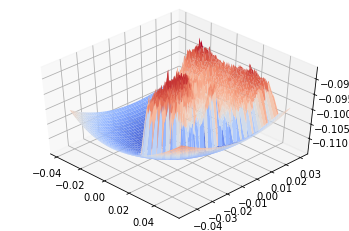

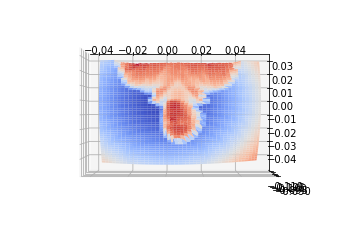

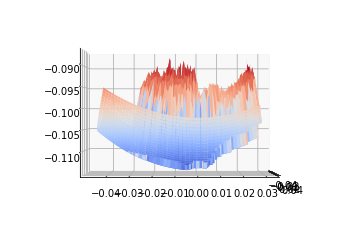

In [ ]:
# if you're not using the notebook in Colab, you can use "%matplotlib notebook"
# to create an interactive plot that can be rotated 
%matplotlib inline
def plot_3d(x,y,z,elev, azim):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(elev=elev, azim=azim)
  ax.plot_surface(x,y,-z,cmap=cm.coolwarm)


plot_3d(x, y, z, 45, -45)
plot_3d(x, y, z, 90, -90)
plot_3d(x, y, z, 0, 0)